# Linear Regression from scratch using

In [59]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the model

In [60]:
def linear(X,b0,b1):
    return [b0+b1*x for x in X]

In [61]:
# b0 -Intercept

def intercept(X,Y,b1):
    x=np.mean(X)
    y=np.mean(Y)

    return y-b1*x

In [62]:
# b1 - Coefficient/slope

def coefficient(X,Y):
    x_mean=np.mean(X)
    y_mean=np.mean(Y)

    numerator=sum([(x-x_mean)*(y-y_mean) for x,y in zip(X,Y)])
    denominator=sum([(x-x_mean)**2 for x in X])

    return numerator/denominator


## Read the dataset

In [63]:
df=pd.read_csv('./Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Exploratory Data Analysis

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [65]:
# price should be in Integer but it is object so we need to convert it into integer
try:
    df[['price']]=df[['price']].astype(int)
except ValueError:
    print("Error: Unable to convert 'price' column to integer.")

Error: Unable to convert 'price' column to integer.


In [66]:
# lets find the invalid value of price
df['price'].value_counts()[:5]

price
?        4
8921     2
18150    2
8845     2
8495     2
Name: count, dtype: int64

In [67]:
df['normalized-losses'].value_counts()[:5]


normalized-losses
?      41
161    11
91      8
150     7
134     6
Name: count, dtype: int64

In [68]:
# if the count of '?' was high the we would have analytically replaced but here we can just drop it
df=df.loc[df['price']!='?']
df[['price']]=df[['price']].astype(int)

In [69]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [70]:
# lets ignore object data type columns and check the correlation
df=df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    int64  
 6   engine-size        201 non-null    int64  
 7   compression-ratio  201 non-null    float64
 8   city-mpg           201 non-null    int64  
 9   highway-mpg        201 non-null    int64  
 10  price              201 non-null    int32  
dtypes: float64(5), int32(1), int64(5)
memory usage: 18.1 KB


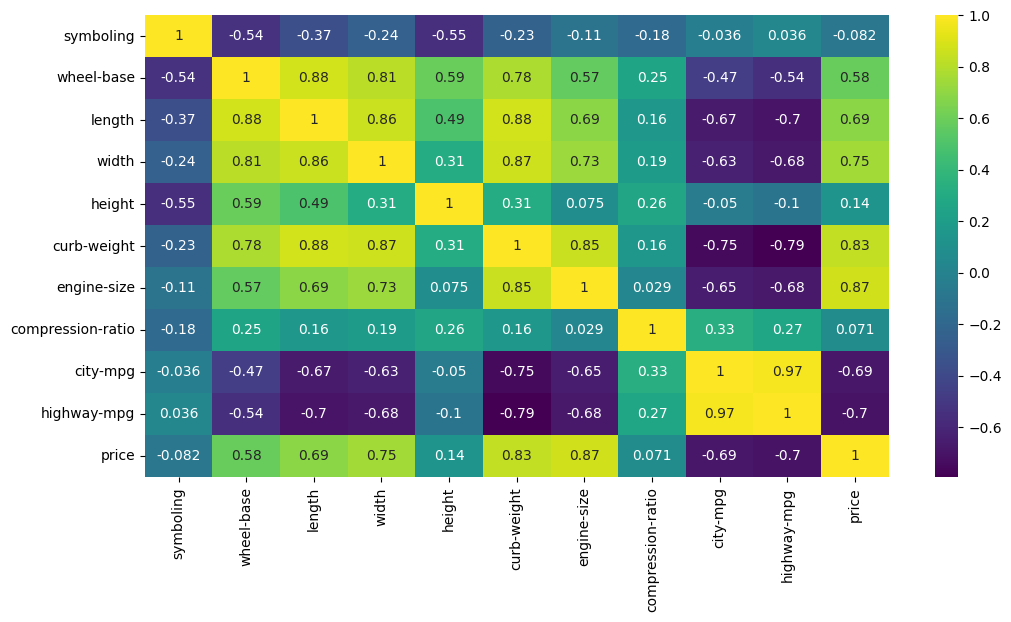

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [72]:
# we can conclude from the heatmap or we can go mathametically

# Calculate the correlation matrix
corr_matrix = df.corr()
# Get the correlation values for the 'price' column, excluding 'price' itself
price_corr = corr_matrix['price'].drop('price')
# Find the feature with the highest absolute correlation with 'price'
highest_corr_feature = price_corr.abs().idxmax()
highest_corr_value = price_corr[highest_corr_feature]

print(f"The feature with the highest correlation with 'price' is '{highest_corr_feature}' with a correlation of {highest_corr_value:.2f}.")

The feature with the highest correlation with 'price' is 'engine-size' with a correlation of 0.87.


## Prepareing the data for Model

In [73]:
final_df=df[['engine-size','price']]
predictor=final_df['engine-size']
target=final_df['price']

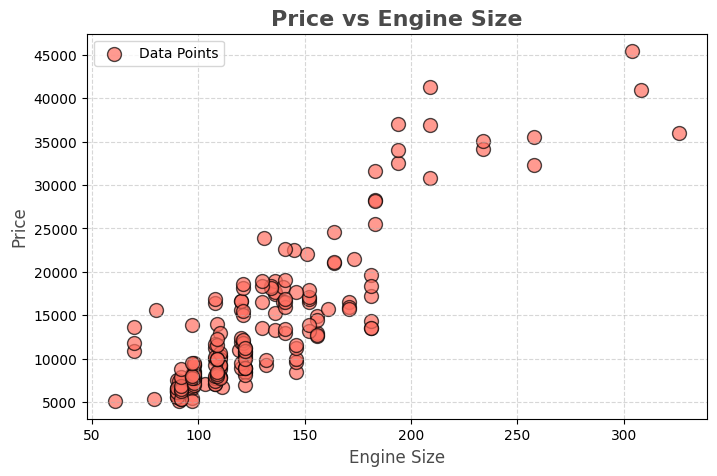

In [74]:
plt.figure(figsize=(8,5))
plt.title("Price vs Engine Size", fontsize=16, fontweight='bold', color='#4a4a4a')
plt.scatter(predictor, target, color="#ff6f61", edgecolor='black', s=100, alpha=0.7, label='Data Points')
plt.xlabel('Engine Size', fontsize=12, color='#4a4a4a')
plt.ylabel('Price', fontsize=12, color='#4a4a4a')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Prediction

In [75]:
b1=coefficient(predictor,target)
b0=intercept(predictor,target,b1)
predicted_price=linear(predictor,b0,b1)

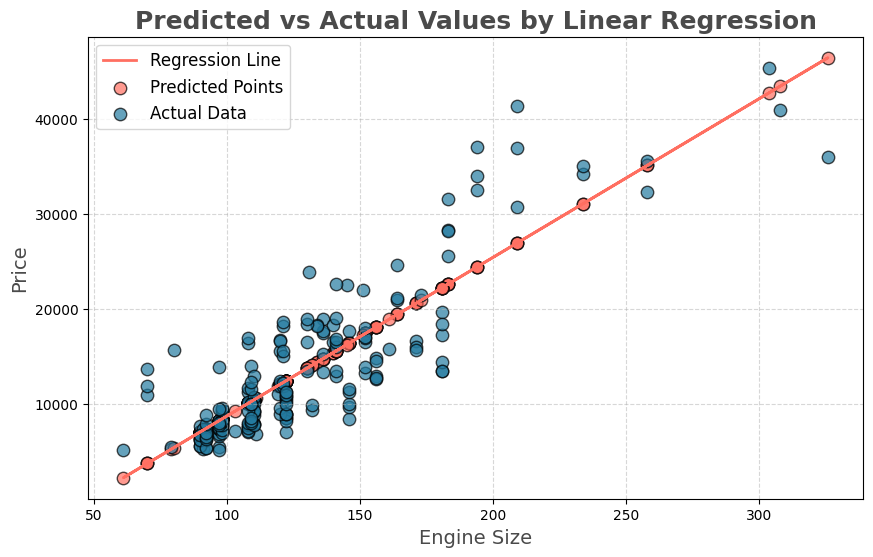

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(predictor, predicted_price, color='#ff6f61', linewidth=2, label='Regression Line')
plt.scatter(predictor, predicted_price, color='#ff6f61', edgecolor='black', s=80, alpha=0.7, label='Predicted Points')
plt.scatter(predictor, target, color="#247ba0", edgecolor='black', s=80, alpha=0.7, label='Actual Data')
plt.title('Predicted vs Actual Values by Linear Regression', fontsize=18, fontweight='bold', color='#4a4a4a')
plt.xlabel('Engine Size', fontsize=14, color='#4a4a4a')
plt.ylabel('Price', fontsize=14, color='#4a4a4a')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [77]:
print("Coefficient(b1): \n",b1)
print("Intercept(b0): \n",b0)

Coefficient(b1): 
 166.8600156914162
Intercept(b0): 
 -7963.338906281075


## Evaluation

In [78]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    
    r_sqr = 1 - (sse / sst)
    
    return r_sqr

In [79]:
r_squared(target,predicted_price)

0.7609686443622008

## lets use sklearn and libraries

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7609686443622008
